# Now genomic selection?

Complex traits are controlled by many small-effect genes. I.e. lets say we only want to optimise for yield.

How do we select for so many genes simulateously, while each gene only contributes a tiny %?

https://www.youtube.com/watch?v=G5lOEbv0Yg4&t=423s

https://www.youtube.com/watch?v=oAoRcgffCjk&t=970s


In [1]:
import os
from pathlib import Path
print(f'Changing to {Path().resolve().parent}')
os.chdir(Path().resolve().parent)

Changing to /home/bnoordijk/vscode_projects/EduXR_minor


In [2]:
from dsplantbreeding.Population import get_agricultural_population, get_natural_population, get_resilient_population
from dsplantbreeding.actions import perform_cross_between

In [3]:
natural_population = get_natural_population()
natural_population.show_all_phenotypes()


    Salt Resistance      Yield
0          1.979529  10.504219
1          2.047894   6.684134
2         -0.051944  11.955474
3         -0.055573   6.075805
4          0.196578  10.844622
5          0.139341   7.044475
6          2.009291  11.546284
7          0.028175   5.003113
8          2.076902   9.168875
9          0.124643   9.921176
10         0.100719   7.333845
11         1.870378   3.446970
12         0.027499   9.979978
13         2.022891   6.100945
14         0.135292  13.830478
15         0.088643   2.641304
16        -0.200164   5.196994
17         1.962816   6.502365
18         0.166903   6.016689
19        -0.043857  14.132713
20         1.946026   9.414593
21         2.047699   8.907790
22         2.324894  12.077249
23         1.897877   7.392112
24        -0.057709   4.726974
25         0.012412  10.357770
26         2.030261   3.485383
27         0.052377   5.472286
28         0.000094   1.856722
29         2.134381   9.205889
30        -0.071354  14.827171
31      

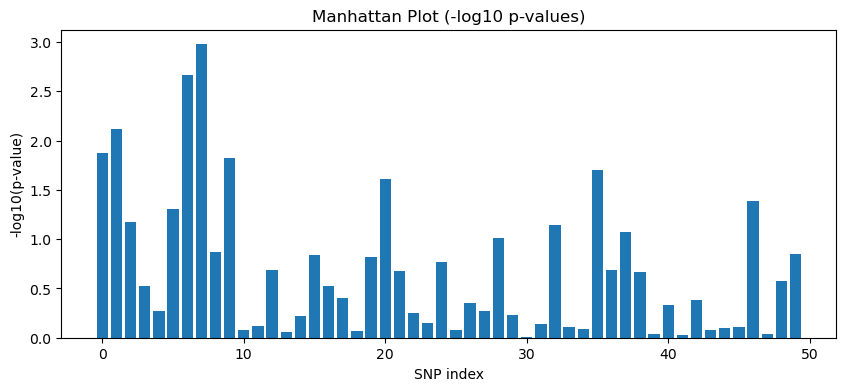

Why would marker assisted selection not be (easily) applicable here? What underlying biology causes this difference?

In [4]:
genomic_selection_model = natural_population.fit_gs_model(target_phenotype='Yield')

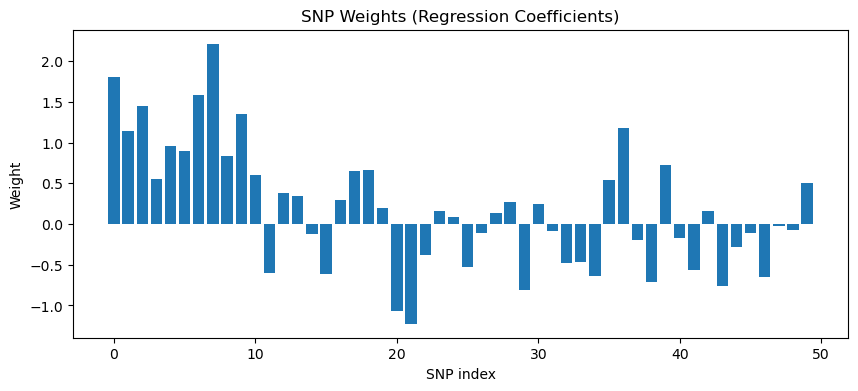

In [ ]:
genomic_selection_model.show_genomic_selection_snp_weights()

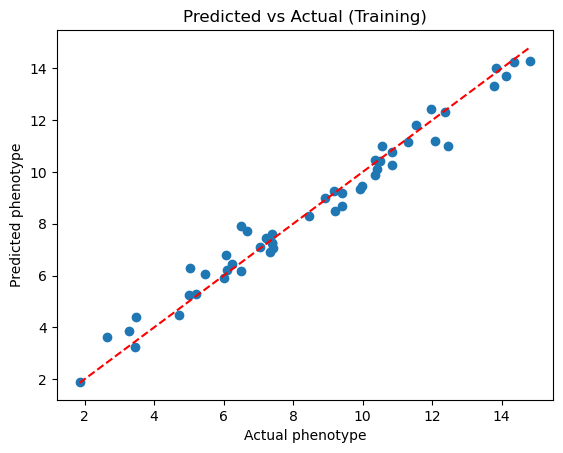

In [6]:
genomic_selection_model.predicted_vs_actual_training_population()

In [7]:
predicted_values = genomic_selection_model.predict_phenotypes(natural_population) # Also called GEBV

new_population = natural_population.select_plants_from_predicted_values(predicted_values, ntop=2)
new_population.n_plants


2

In [8]:

f1 = perform_cross_between(new_population, new_population, n_offspring=10)

f1_gebv = genomic_selection_model.predict_phenotypes(f1) # Also called GEBV

selected_f1 = f1.select_plants_from_predicted_values(f1_gebv, ntop=2)

f2 = perform_cross_between(selected_f1, selected_f1, n_offspring=10)

# Now select plants based on highest values
f2.show_phenotype('Yield')
# This allows us to maximise for traits that are controlled by many genes.

0    19.467448
1    16.180764
2    20.523936
3    14.207685
4    15.775830
5    16.010551
6    17.300976
7    17.151930
8    16.669966
9    15.905240
Name: Yield, dtype: float64


And again compare to randomly crossing

In [10]:
natural_population = get_natural_population()
f1 = perform_cross_between(natural_population, natural_population, n_offspring=10)
f2 = perform_cross_between(f1, f1, n_offspring=10)
f2.show_phenotype('Yield')

0    11.467448
1     3.180764
2     8.523936
3     3.207685
4     8.775830
5    11.010551
6     7.300976
7    10.151930
8    10.669966
9     3.905240
Name: Yield, dtype: float64
